 Total Seats Won by Each Party

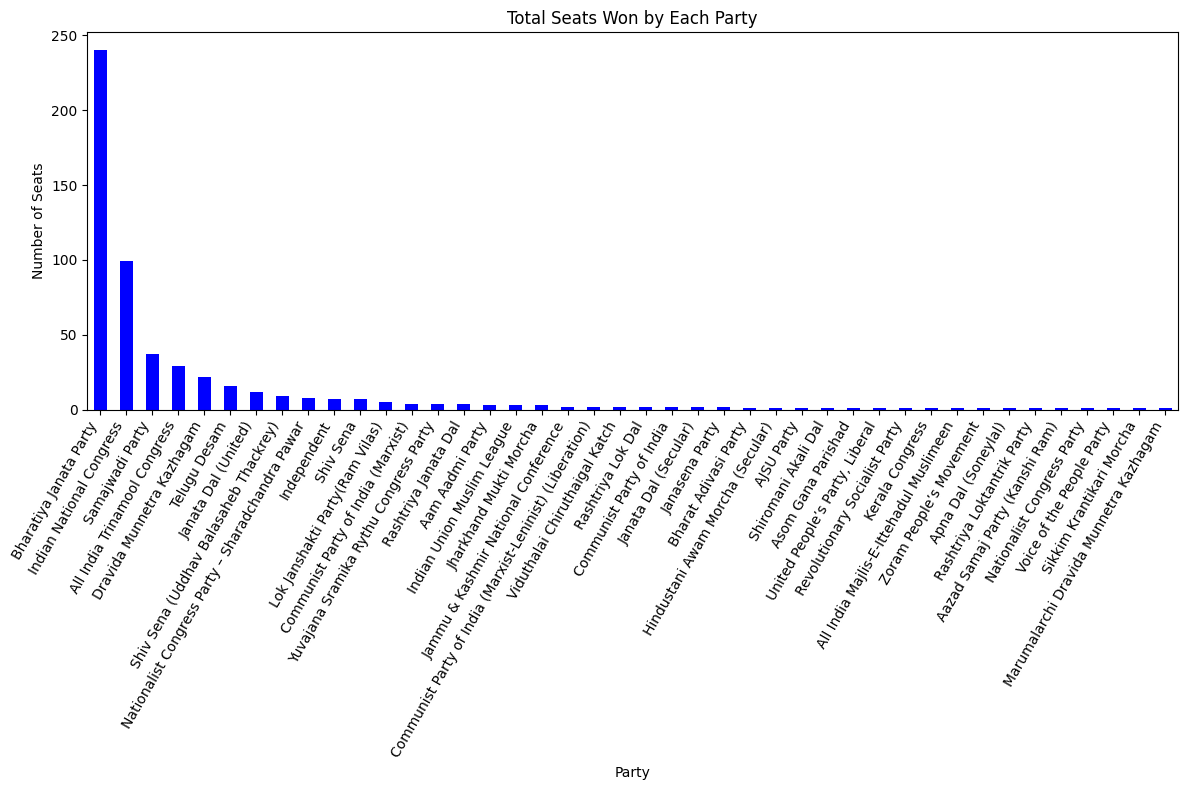

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/home/cherry/kalvium/election_results_2024.csv')

party_wise_seats = df['Leading Party'].value_counts()

plt.figure(figsize=(12,8))
party_wise_seats.plot(kind='bar', color='blue')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

Top 5 Constituencies with Largest Vote Margin


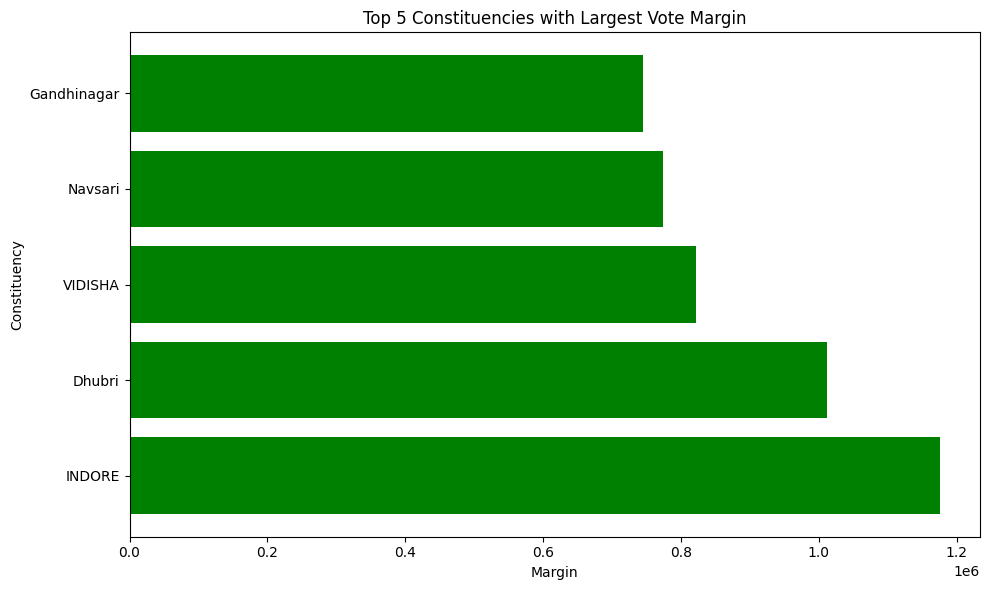

In [2]:

df['Margin'] = pd.to_numeric(df['Margin'].str.replace(',', ''), errors='coerce')

top_5_large_margin = df.sort_values(by='Margin', ascending=False).head(5)


plt.figure(figsize=(10, 6))
plt.barh(top_5_large_margin['Constituency'], top_5_large_margin['Margin'], color='green')
plt.title('Top 5 Constituencies with Largest Vote Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.tight_layout()
plt.show()


Top 5 Constituencies with Smallest Vote Margin

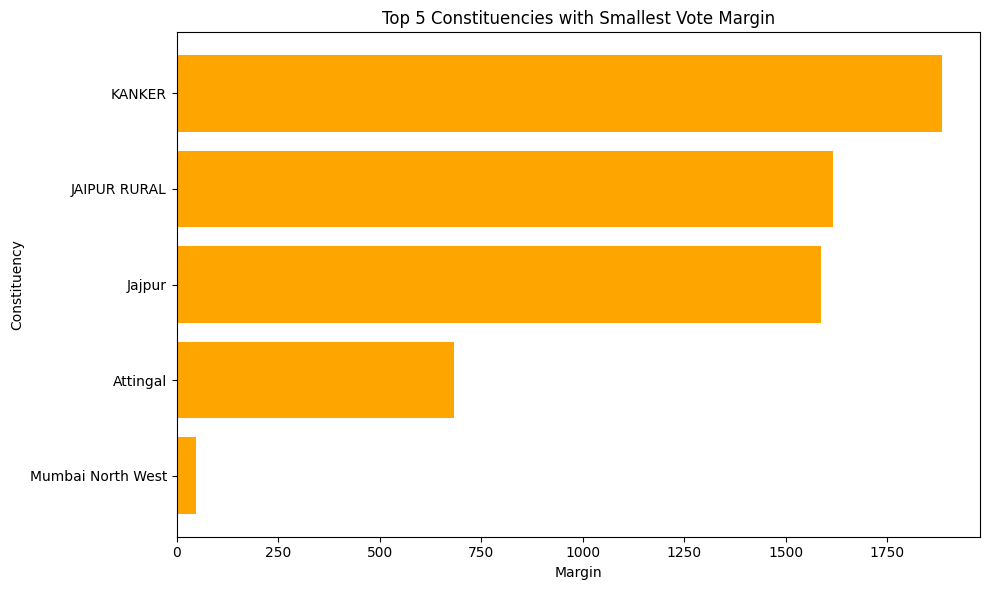

In [3]:

top_5_small_margin = df.sort_values(by='Margin').head(5)


plt.figure(figsize=(10, 6))
plt.barh(top_5_small_margin['Constituency'], top_5_small_margin['Margin'], color='orange')
plt.title('Top 5 Constituencies with Smallest Vote Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.tight_layout()
plt.show()


Percentage of Seats Won by Major Parties

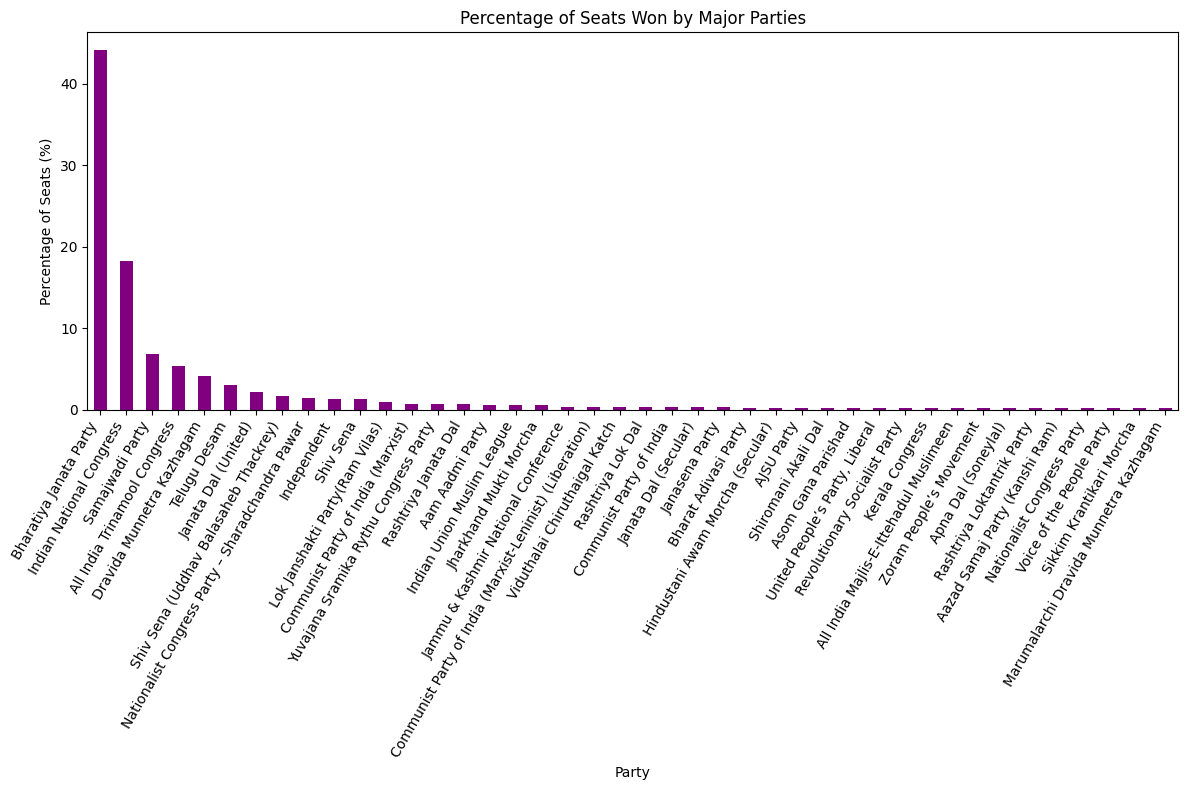

In [15]:

major_parties = df['Leading Party'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 8))
major_parties.plot(kind='bar', color='purple')
plt.title('Percentage of Seats Won by Major Parties')
plt.xlabel('Party')
plt.ylabel('Percentage of Seats (%)')
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
plt.show()


Number of Constituencies with Close Contests (Margin < 5000)

In [5]:

close_contests = df[df['Margin'] < 5000]['Constituency'].nunique()

print(f'Number of constituencies with close contests (Margin < 5000): {close_contests}')


Number of constituencies with close contests (Margin < 5000): 17


 Average Margin of Victory by Party

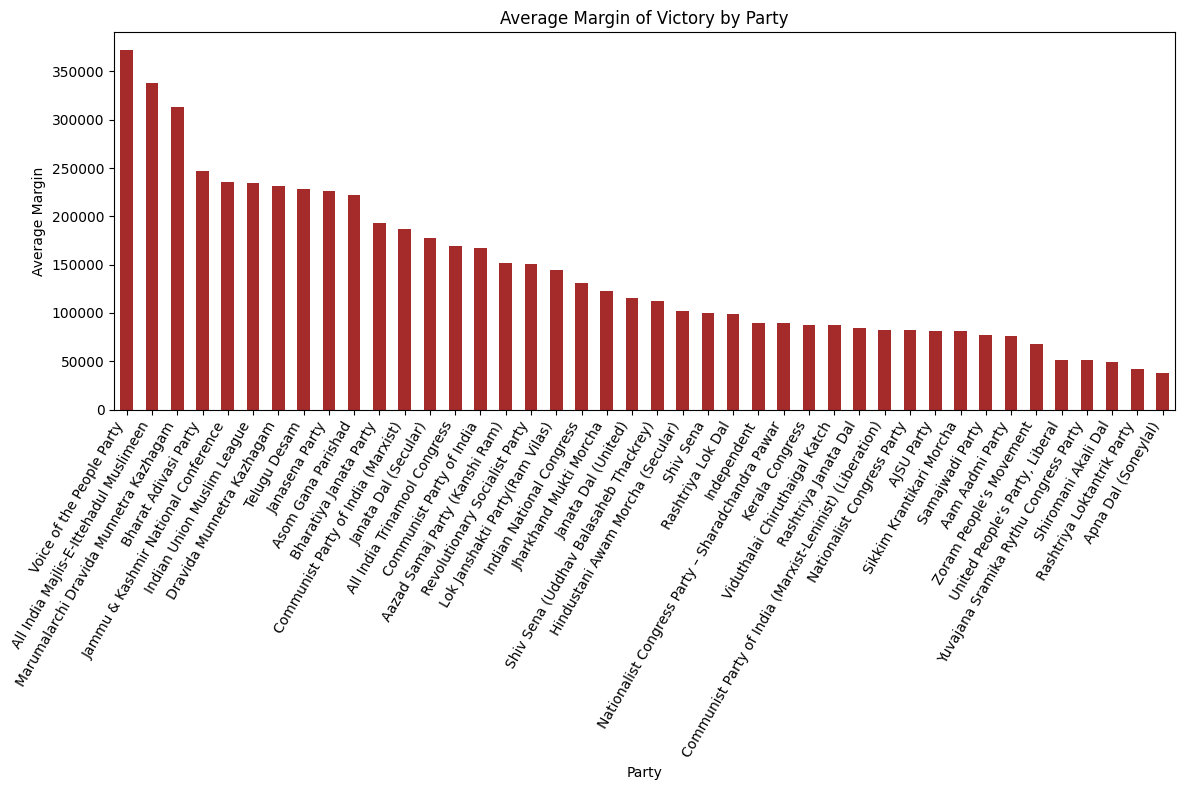

In [14]:

df['Margin'] = pd.to_numeric(df['Margin'].str.replace(',', ''), errors='coerce')

df = df.dropna(subset=['Margin'])

avg_margin_by_party = df.groupby('Leading Party')['Margin'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_margin_by_party.plot(kind='bar', color='brown')
plt.title('Average Margin of Victory by Party')
plt.xlabel('Party')
plt.ylabel('Average Margin')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()



Distribution of Margins Across All Constituencies


In [7]:

incumbent_seats = df[df['Status'] == 'Incumbent'].shape[0]

print(f'Number of seats won by incumbent candidates: {incumbent_seats}')


Number of seats won by incumbent candidates: 0


EDA

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport



data=pd.read_csv('/home/cherry/kalvium/election_results_2024.csv')

df = pd.DataFrame(data)

profile = ProfileReport(df, title='Elections Profiling Report', explorative=True)

profile.to_file("output.html")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]